In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.io
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data
mat = scipy.io.loadmat('data.mat')

--- 
 ## Step 1

In [3]:
average_var_F1 = []
average_mean_F1 = []
#calculate columns
for i in range(0,5):
    F1 = np.array(mat["F1"][0:100,[i]])
    var_f1 = np.var(F1)
    mean_f1 = np.mean(F1)
#     print("F1",F1,i)
    average_var_F1.append(var_f1)
    average_mean_F1.append(mean_f1)

In [4]:
for num11 in range(5):
    print('m1'+str(num11+1)+' = '+str(average_mean_F1[num11]))

m11 = 7.093276745822095
m12 = 9.144547521590674
m13 = 4.287691491993289
m14 = 13.33749006747352
m15 = 11.24185889702683


In [5]:
for num12 in range(5):
    print('var1'+str(num12+1)+' = '+str(average_var_F1[num12]))

var11 = 4.242083092666572
var12 = 5.264687407441236
var13 = 5.087568385990322
var14 = 3.760788754269051
var15 = 4.022309590554696


In [6]:
average_var_F2 = []
average_mean_F2 = []
#calculate columns
for i in range(0,5):
    F1 = np.array(mat["F2"][0:100,[i]]) 
    var_f1 = np.var(F1)
    mean_f1 = np.mean(F1)
    average_var_F2.append(var_f1)
    average_mean_F2.append(mean_f1)

In [7]:
for num21 in range(5):
    print('m2'+str(num21+1)+' = '+str(average_mean_F2[num21]))

m21 = 0.9437745580004682
m22 = 4.97942762175956
m23 = 1.8343812239039996
m24 = 3.0140986679897996
m25 = 1.0249099445406251


In [8]:
for num22 in range(5):
    print('var2'+str(num22+1)+' = '+str(average_var_F2[num22]))

var21 = 0.71920000947922
var22 = 1.3795600340845644
var23 = 1.0659821430276346
var24 = 0.27699546926623164
var25 = 0.4612314887016689


## Step 2
Assume that 𝑋 = 𝐹1.<br>Using the Bayes' theorem, calculate theprobability of each class for data ofthe remaining subjects (columns 101-1000of 𝐹1)and consequently predict the class for each data point. <br>Note that each subjectperformed 5 differenttasks so you need to predict the class of 4500 data points.

In [9]:
F1 = np.array(mat["F1"])
F2 = np.array(mat["F2"])

In [10]:
step1_F1,step1_F2 = {},{}
for i in range(0,5):
    step1_F1["m" + str(i+1) ] = average_mean_F1[i]
    step1_F1["var" + str(i+1) ] = average_var_F1[i]
    step1_F2["m" + str(i+1) ] = average_mean_F2[i]
    step1_F2["var" + str(i+1) ] = average_var_F2[i]
    

In [11]:
#step 2.1
def testing_data(data):
    list7=[]
    for i in range(100,1000):
        list7.append(list(data[i]))
    return list7


In [12]:
#getting prediction
def prediction(data, mean_var):
    pro = []
    for k in range(1,6):
        pro.append(stats.norm.pdf(data, mean_var['m'+str(k)], np.sqrt(mean_var['var'+str(k)])))
    prediction = np.argmax(pro)+1
    return prediction


In [13]:
#step 2.2
test_F1 = testing_data(F1)
orignal = []
pred = []
for i in range(900):
    data1 = test_F1[i]
    for j in range(5):
        orignal.append(j+1)
        data2 = data1[j]
        pred.append(prediction(data2,step1_F1))
right = 0
for num in range(len(pred)):
    if pred[num] == orignal[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(acc))
print('Error rate = '+str(err))

Classification accuracy = 0.53
Error rate = 0.47


## Step 3


Calculate 𝑍1(the  standard  normal  of𝐹1)  
<br>
plot  the  distribution  of  the  data  using 𝑍1and 𝐹2
<br>
and compare it to the distribution in 𝐹1and 𝐹2shown on right.

In [14]:
# Fi is dataset, stepi_Fi is information of mean and variance
def create_zi( Fi , stepi_Fi  ): 
    Zi = []
    for i in range(0,len(Fi)): 
        z_column = []
        for j in range(0, 5): 
            average_mean = stepi_Fi["m" + str(j+1)]
            average_var = stepi_Fi["var" + str(j+1)] 
            zi_c =( Fi[i,:][j]- average_mean) / np.sqrt(average_var)
            z_column.append(zi_c)
        Zi.append(z_column)
    return Zi
Z1= create_zi(F1, step1_F1)


In [15]:
# Preprocess data to it's classified value
# 3.43543 -> 3
def classified_z(F1,step1_F1):
    classified_z = []
    for i in range(0, 1000):
        local_classified_z = []

        for j in range(0,5):
    #         print("j" , j)
    #         print("i" , i) 
    #         print(F1[i][:]) 
            temp_z = prediction(F1[i][j], step1_F1) 
            local_classified_z.append(temp_z)
        classified_z.append(local_classified_z)
    return classified_z
classified_z = classified_z(F1,step1_F1)

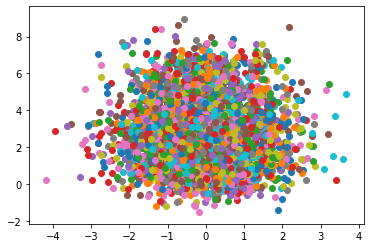

In [16]:
for i in range(0,4):
    for j in range(0,1000):
        if classified_z[j][i] == 4:
            plt.scatter(Z1[j][i], F2[j][i])
        elif classified_z[j][i] == 3:
            plt.scatter(Z1[j][i], F2[j][i])
            
        elif classified_z[j][i] == 2:
            plt.scatter(Z1[j][i], F2[j][i])
        elif classified_z[j][i] == 1:
            plt.scatter(Z1[j][i], F2[j][i])
            
        elif classified_z[j][i] == 5:
            plt.scatter(Z1[j][i], F2[j][i])
plt.savefig("normalized Z1F2.png")

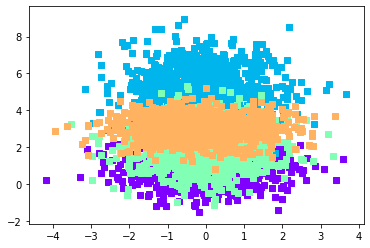

In [17]:
colors = cm.rainbow(np.linspace(0, 1, 5))

for i in range(0,4):
    for j in range(0,1000):
        if classified_z[j][i] == 4:
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 3:
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 2:  
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 1:  
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1 
        elif classified_z[j][i] == 5:   
            plt.scatter(Z1[j][i], F2[j][i], color = colors[i], marker = "," )#,  alpha =0.1

plt.savefig("normalized Z1F2.png")

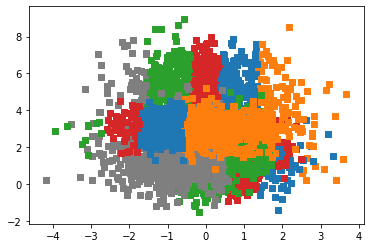

In [18]:
for i in range(0,4):
    for j in range(0,1000):
        if classified_z[j][i] == 4:
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:orange", marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 3:
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:grey",   marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 2:  
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:red",    marker = "," )#,  alpha =0.1
        elif classified_z[j][i] == 1:  
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:green",  marker = "," )#,  alpha =0.1 
        elif classified_z[j][i] == 5:   
            plt.scatter(Z1[j][i], F2[j][i], c = "tab:blue",   marker = "," )#,  alpha =0.1

plt.savefig("normalized Z1F2_tab.png")

## Step 4

In [19]:
#case 2: X = Z1
#repeat train step
average_var_Z1 = []
average_mean_Z1 = []
#calculate columns
for i in range(0,5):
    F1 = np.array(np.array(Z1)[0:100,[i]]) 
    var_f1 = np.var(F1)
    mean_f1 = np.mean(F1)
    average_var_Z1.append(var_f1)
    average_mean_Z1.append(mean_f1)
step1_Z1 = {}
for i in range(0,5):
    step1_Z1["m" + str(i+1) ] = average_mean_Z1[i]
    step1_Z1["var" + str(i+1) ] = average_var_Z1[i]
    

In [20]:
#test for Z1
test_Z1 = testing_data(Z1)
orignalZ1 = []
predZ1 = []
for i in range(900):
    data1 = test_Z1[i]
    for j in range(5):
        orignalZ1.append(j+1)
        data2 = data1[j]
        predZ1.append(prediction(data2,step1_Z1))

right = 0
for num in range(len(predZ1)):
    if predZ1[num] == orignalZ1[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(round(acc,4)))
print('Error rate = '+str(round(err,4)))

Classification accuracy = 0.2016
Error rate = 0.7984


In [21]:
#case 3: X = F2
test_F2 = testing_data(F2)
orignal2 = []
pred2 = []
for i in range(900):
    data1 = test_F2[i]
    for j in range(5):
        orignal2.append(j+1)
        data2 = data1[j]
        pred2.append(prediction(data2,step1_F2))

right = 0
for num in range(len(pred2)):
    if pred2[num] == orignal2[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(round(acc,4)))
print('Error rate = '+str(round(err,4)))

Classification accuracy = 0.5516
Error rate = 0.4484


In [22]:
#case 4: X = [Z1,F2]
from scipy.stats import multivariate_normal

orignal3 = []
pred3 = []
for i in range(900):
    pro = []
    data1 = test_Z1[i]
    data2 = test_F2[i]
    for j in range(5):
        Z1 = data1[j]
        F2 = data2[j]
        orignal3.append(j+1)
        for k in range(1,6):
            x, mean, cov = [Z1,F2],[step1_Z1['m'+str(k)],step1_F2['m'+str(k)]], [[step1_Z1['var'+str(k)],0],[0,step1_F2['var'+str(k)]]]
            #x, mean, cov = [Z1,F2],[Z1_mean,F2_mean], [[Z1_var,0],[0,F2_var]]
            pro.append(multivariate_normal.pdf(x, mean, cov))
        pred3.append(np.argmax(pro)+1)

right = 0
for num in range(len(pred3)):
    if pred3[num] == orignal3[num]:
        right = right + 1
acc = right / 4500
err = (4500-right) / 4500
print('Classification accuracy = '+str(round(acc,4)))
print('Error rate = '+str(round(err,4)))

Classification accuracy = 0.0824
Error rate = 0.9176
